In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
os.environ["OMP_NUM_THREADS"] = "1"


In [4]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Display first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
print(df.info())  # Check data types and missing values
print(df.isnull().sum())  # Check missing values count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


C:\Users\mehar\AppData\Local\Temp\ipykernel_844\96974444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="coolwarm")


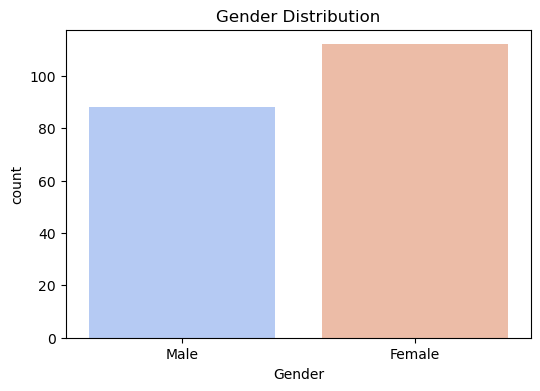

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()


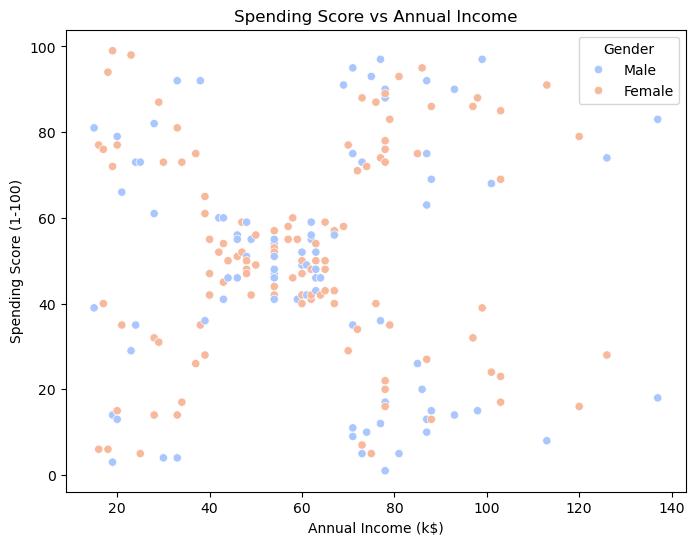

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Gender"], palette="coolwarm")
plt.title("Spending Score vs Annual Income")
plt.show()


In [8]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

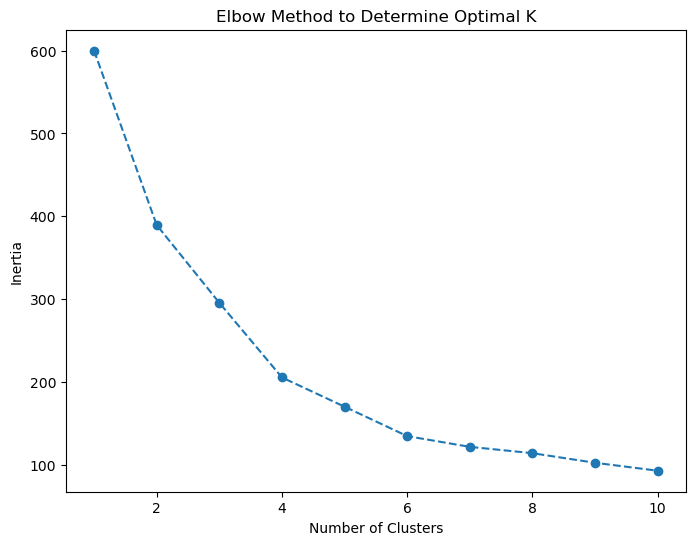

In [10]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal K")
plt.show()


In [11]:
# Set number of clusters based on elbow method (example: K=5)
optimal_k = 5

# Apply K-Means with fixes
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Show cluster counts
df["Cluster"].value_counts()


E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64

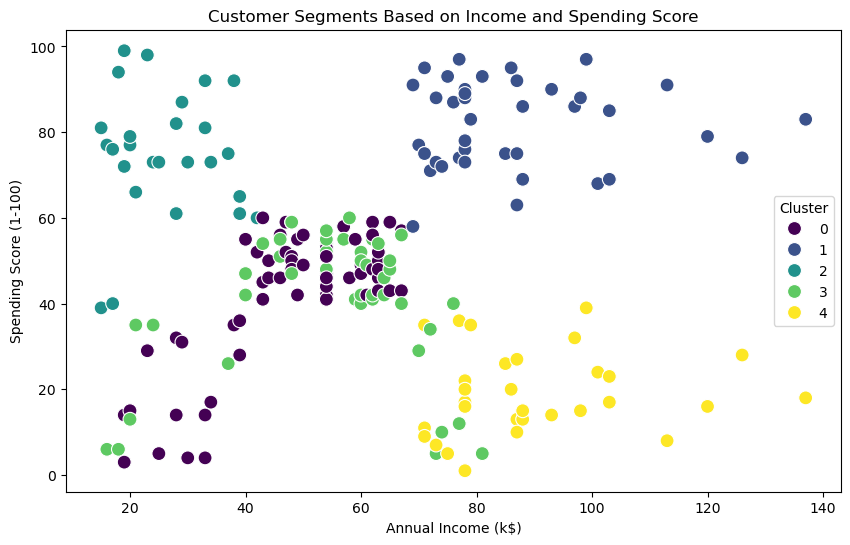

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="viridis", s=100)
plt.title("Customer Segments Based on Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


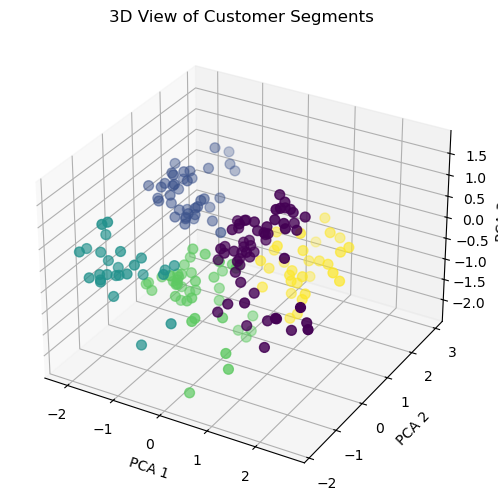

In [13]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df["Cluster"], cmap="viridis", s=50)
ax.set_title("3D View of Customer Segments")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.show()


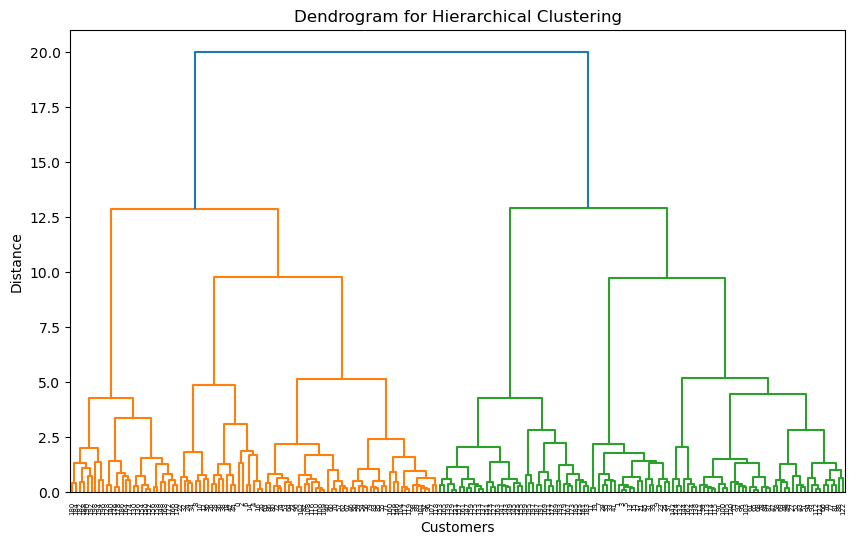

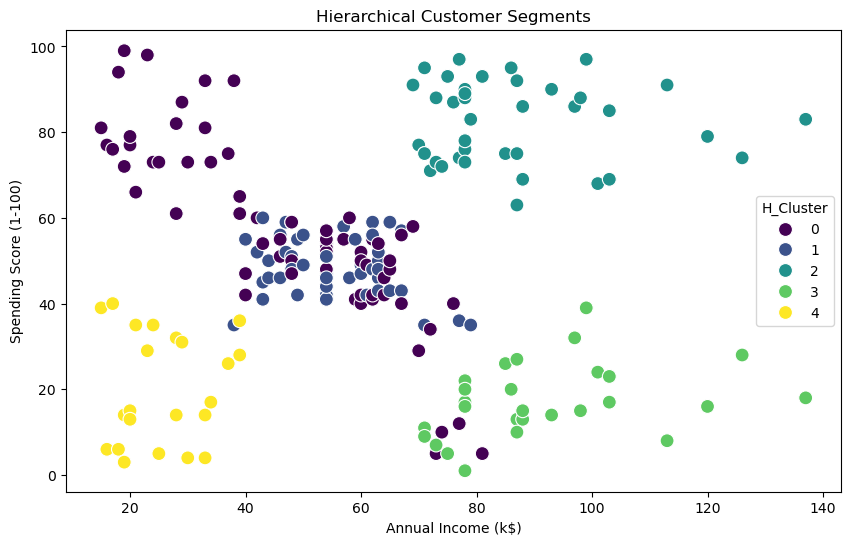

In [14]:
# Import required libraries for Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Create Dendrogram to find optimal clusters
plt.figure(figsize=(10, 6))
dendrogram(linkage(X_scaled, method="ward"))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# Apply Hierarchical Clustering
h_cluster = AgglomerativeClustering(n_clusters=5, linkage="ward")
df["H_Cluster"] = h_cluster.fit_predict(X_scaled)

# Visualize Hierarchical Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["H_Cluster"], palette="viridis", s=100)
plt.title("Hierarchical Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [15]:
df.groupby("Cluster").mean(numeric_only=True)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),H_Cluster
Cluster,,,,,
0,68.775862,55.275862,47.620690,41.706897,1.689655
1,161.025000,32.875000,86.100000,81.525000,1.950000
2,23.461538,25.769231,26.115385,74.846154,0.307692
3,86.377778,26.733333,54.311111,40.911111,0.533333
4,166.870968,44.387097,89.774194,18.483871,2.806452


In [16]:
df.to_csv("Mall_Customers_Clustered.csv", index=False)


In [17]:
pip install streamlit pandas scikit-learn joblib


Note: you may need to restart the kernel to use updated packages.


In [18]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib

# Load trained model
model = joblib.load("customer_segmentation_model.pkl")

st.title("Customer Segmentation Predictor")

# Input fields
income = st.number_input("Annual Income (k$)", min_value=0, max_value=200, value=50)
spending = st.number_input("Spending Score (1-100)", min_value=0, max_value=100, value=50)

# Prediction
if st.button("Predict Segment"):
    df = pd.DataFrame([[income, spending]], columns=["Annual Income (k$)", "Spending Score (1-100)"])
    cluster = model.predict(df)
    st.success(f"Predicted Customer Segment: {cluster[0]}")


Overwriting app.py


In [19]:
import pandas as pd
import joblib
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Train KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Save the trained model
joblib.dump(kmeans, "customer_segmentation_model.pkl")

print("Model saved successfully as customer_segmentation_model.pkl!")


Model saved successfully as customer_segmentation_model.pkl!


E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
import os

model_path = os.path.abspath("customer_segmentation_model.pkl")
model = joblib.load(model_path)


In [ ]:
#streamlit run app.py On Command Prompt